# Wealth Transfer

This is a demonstration on how to create a simple agent-based model with the [agentpy](https://agentpy.readthedocs.io) package. It shows how to create a custom agent and model class, run a model, and visualize output data. The model explores the distribution of wealth under a trading population of agents. The [original version of this model](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html) has been written in [MESA](https://mesa.readthedocs.io/) by the Project Mesa Team. This is an adaption of the same model to agentpy, allowing for a comparison between the two frameworks.

To start, we import agentpy and numpy:

In [1]:
import agentpy as ap
import numpy as np

In [2]:
class wealth_agent(ap.Agent):
    
    """ An agent with wealth """
    
    def setup(self):

        self.wealth = 1

    def wealth_transfer(self):
        
        if self.wealth > 0:
            
            partner = self.model.agents.random()
            partner.wealth += 1
            self.wealth -= 1   

In [3]:
def gini(x):
    
    """ Calculate Gini Coefficient """
    # By Warren Weckesser https://stackoverflow.com/a/39513799
    
    mad = np.abs(np.subtract.outer(x, x)).mean() # Mean absolute difference
    rmad = mad/np.mean(x) # Relative mean absolute difference
    return 0.5 * rmad 

In [19]:
class wealth_model(ap.Model):
    
    """ A simple model of random wealth transfers """
    
    def setup(self):
        
        self.add_agents(self.p.agents, wealth_agent)
    
    def step(self):
        
        self.agents.wealth_transfer()
        
    def update(self):
        
        self.record('Gini Coefficient', gini(self.agents.wealth))
        
    def end(self):
        
        self.agents.record('wealth')

In [20]:
parameters = {
    'agents': 100,
    'steps': 100
}

In [21]:
model = wealth_model(parameters)
results = model.run()

Completed: 100 steps
Run time: 0:00:00.175178
Simulation finished


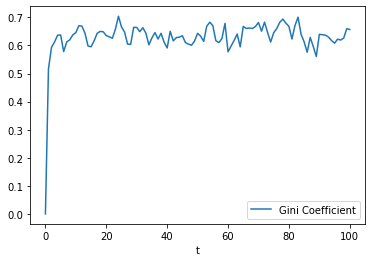

In [22]:
data = results.variables.model
ax = data.xs('model').plot()

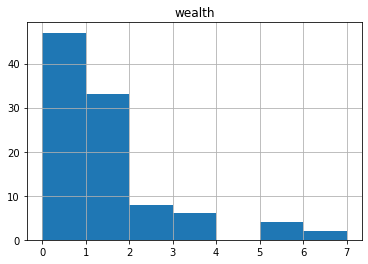

In [23]:
data = results.variables.wealth_agent
ax = data.hist(bins=range(data.wealth.max()+1))